#STT: 16

#Họ và tên: Lưu Quang Tiến Hoàng

#Lớp: DS105.M11.2

#Buổi 04 - Lab6

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns

##Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên. Xuất 5 samples đầu tiên. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [106]:
Ex = pd.ExcelFile('/content/drive/MyDrive/DS105/Lab7/Canada (2).xlsx')
Ex.sheet_names

['Regions by Citizenship',
 'Canada by Citizenship',
 'Canada by Citizenship (2)']

In [107]:
df=Ex.parse('Canada by Citizenship',skiprows=range(20), skipfooter=2)
df

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


##Câu 2. Đổi tên các column thành tên mới như sau: columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}. Sau đó loại bỏ các column ['AREA','REG','DEV','Type','Coverage'] ra khỏi dataset.

In [108]:
df=df.rename(columns={'OdName':'Country','AreaName':'Continent', 'RegName':'Region'})

In [109]:
df=df.drop(columns=['AREA','REG','DEV','Type','Coverage'])

##Câu 3. Tạo thêm cột 'Total' trong dataset, lưu trữ tổng số người từ năm 1980 đến 2013 của từng quốc gia.

In [110]:
df['Total']=df.sum(axis=1)

<ipython-input-110-7ecbd0406154>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total']=df.sum(axis=1)


In [111]:
df

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


##Câu 4. Chuyển đổi các giá trị trong cột Country thành index của dòng.

In [112]:
df=df.set_index(['Country'])
df

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


##Câu 5. Gọi biến years lưu trữ thông tin các cột của các năm từ 1980 đến năm 2013 (years = [1980, 1981, ..., 2013]). Thiết kế các cách truy vấn trả về một dataframe với input là một country bất kỳ.

In [113]:
Japan= df.loc['Japan',1980:2013]
Japan

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

In [114]:
Haiti= df.loc['Haiti',1980:2013]
Haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

In [115]:
years=df.iloc[:,3:37].columns
years

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='object')

In [116]:
def df_country(country ,y= years):
 for i in df.index:
   if i == country:
     print(df[years].loc[i])

In [117]:
df_country(country= 'Japan',y=  years)

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: int64


##Câu 6. Tạo plot thể hiện số lượng di cư (sự biến động, diễn biến) của Hati và Japan đến Canada từ năm 1980 đến 2013.

In [118]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])

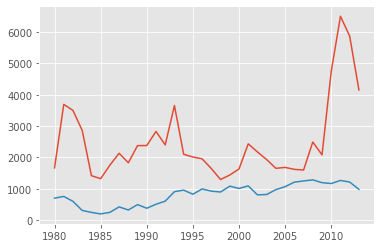

In [119]:
Haiti.plot(kind='line')
Japan.plot(kind='line')
plt.show()

##Câu 7. Tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013.

In [120]:
df.sort_values(['Total'], ascending=False, axis=0,inplace=True)
dftop5=df.head()
dftop5=dftop5.loc[:,1980:2013].transpose()

In [121]:
dftop5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


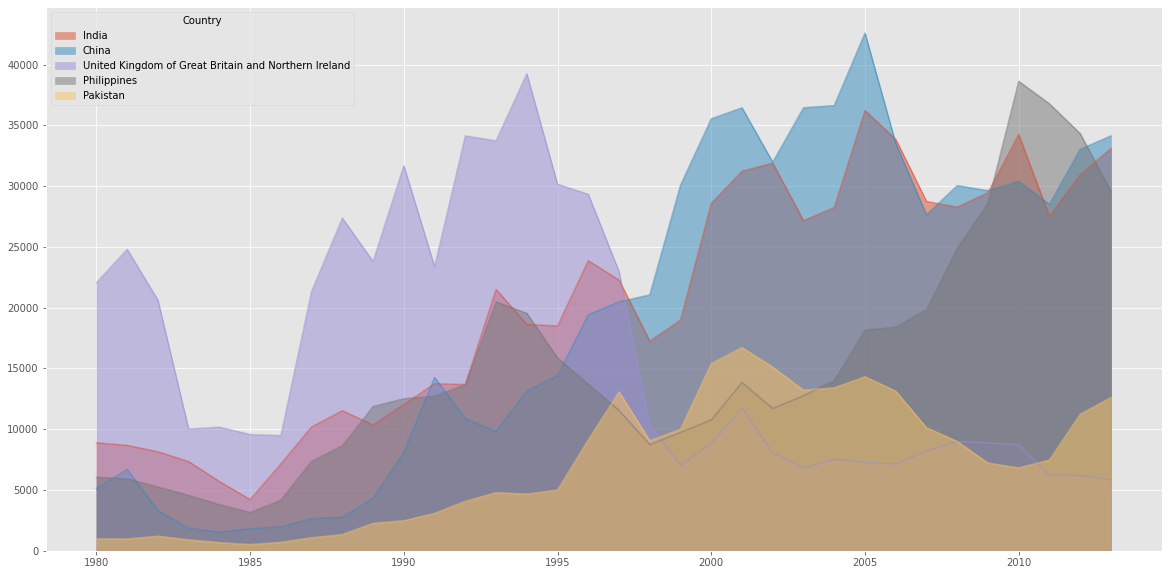

In [122]:
dftop5.plot(kind='area',stacked=False,figsize=(20,10),)

##Câu 8. Tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư thấp nhất vào Canada từ năm 1980 đến 2013.

In [123]:
df.sort_values(['Total'], ascending=True, axis=0,inplace=True)
dftop5_m=df.head()
dftop5m=dftop5_m.loc[:,1980:2013].transpose()

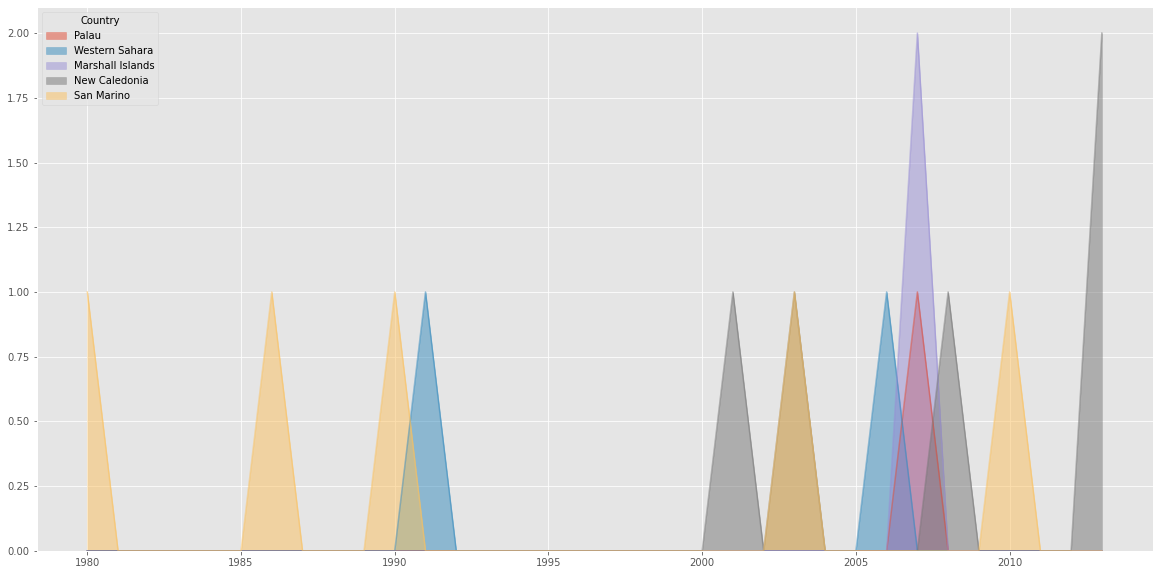

In [124]:
dftop5m.plot(kind='area',stacked=False,figsize=(20,10),)

##Câu 9. Tạo các plot thể hiện tần suất di cư của các nước đến Canada cho từng năm 2010, 2011, 2012 và 2013. Nhận xét gì tần suất di cư đến Canada của các năm đó.

In [125]:
def year(y):
 count,bin_edges = np.histogram(df[2010])
 return bin_edges

Text(0.5, 0, 'Số lượng người di cư')

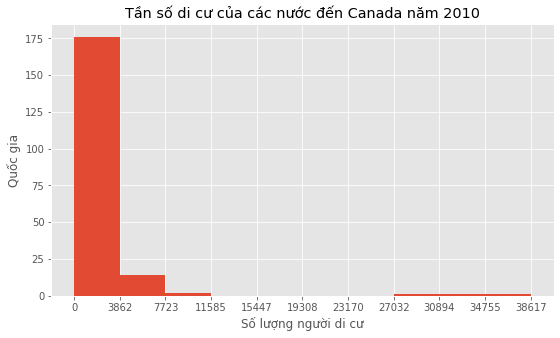

In [126]:
df[2010].plot(kind='hist', figsize=(9,5), xticks=year(2010))
plt.title("Tần số di cư của các nước đến Canada năm 2010")
plt.ylabel('Quốc gia')
plt.xlabel('Số lượng người di cư')

Text(0.5, 0, 'Số lượng người di cư')

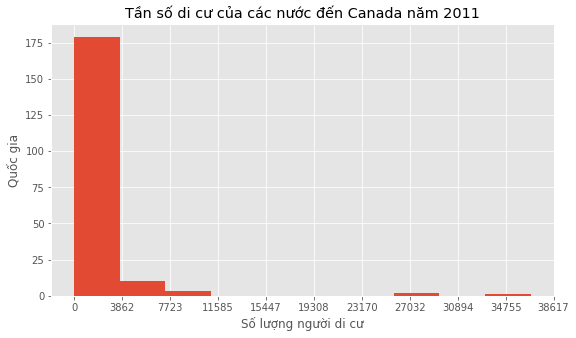

In [127]:
df[2011].plot(kind='hist', figsize=(9,5), xticks=year(2011))
plt.title("Tần số di cư của các nước đến Canada năm 2011")
plt.ylabel('Quốc gia')
plt.xlabel('Số lượng người di cư')

Text(0.5, 0, 'Số lượng người di cư')

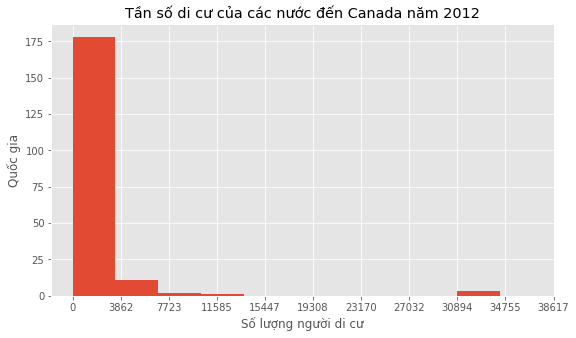

In [128]:
df[2012].plot(kind='hist', figsize=(9,5), xticks=year(2012))
plt.title("Tần số di cư của các nước đến Canada năm 2012")
plt.ylabel('Quốc gia')
plt.xlabel('Số lượng người di cư')

Text(0.5, 0, 'Số lượng người di cư')

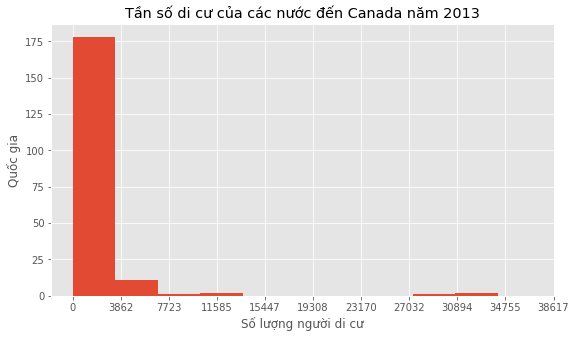

In [129]:
df[2013].plot(kind='hist', figsize=(9,5), xticks=year(2013))
plt.title("Tần số di cư của các nước đến Canada năm 2013")
plt.ylabel('Quốc gia')
plt.xlabel('Số lượng người di cư')

##Câu 10. Tạo các plot thể hiện tỉ lệ nhập cư của mỗi lục địa vào Canada từ năm 1980 đến 2013.

In [130]:
df_continents = df.groupby('Continent',axis = 0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


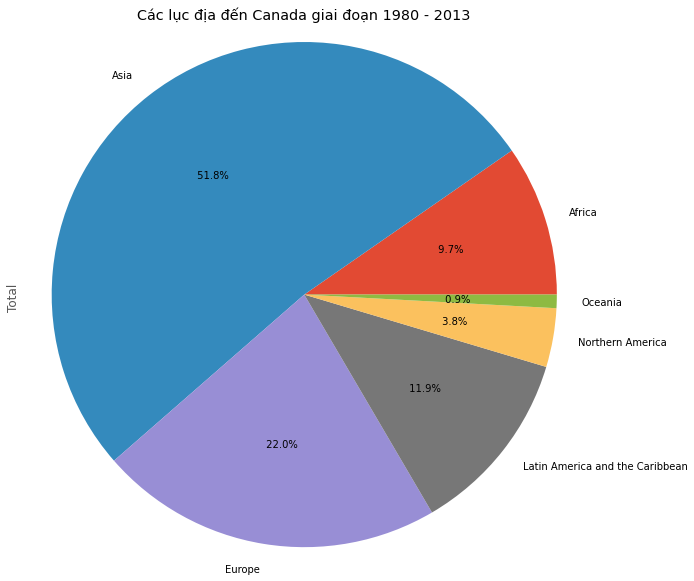

In [131]:
df_continents['Total'].plot(kind = 'pie', figsize = (10,10),autopct = ' %1.1f%%')
plt.title('Các lục địa đến Canada giai đoạn 1980 - 2013')
plt.axis('equal')
plt.show()